In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

## Mappeoppgave 2 - Innføring av bompenger i Tromsø: Effekt på bilisters atferd og velferd

### Kapittel 1. Innledning 

Inntekter fra bomstasjoner er blitt et stadig viktigere verktøy for å skape inntekter og redusere eksternaliteter. I Norge har inntekter fra bompenger økt fra 3 milliarder til 11 milliarder kroner ifra 2005 til 2018, noe som toalt utgjør 18-19% av alle bilrelaterte skatter og avgifter (Sand et al., 2022). Bompenger er viktig både for å skaffe inntekter til å finansiering av infrastuktur, men også til å regulere trafikk. El-biler ble frem til 2018 fritatt fra bompenger, og har i ettertid betalt reduserte takster, således har bompenger også bidratt til å elektrifisere bilparken, dette er en politisk målsettning som er viktig for å nå klimamålene. Informasjon om hvilke effekter bompenger har på bilister kan være nyttig av flere årsaker, men først og fremst for beslutningstakerne.  

Denne oppgaven vil i hovedsak undersøke hvilke effekter bompenger har på bilister, og på trafikkbildet i Tromsø. Oppgaven vil ta i bruk samfunnsøkonomisk teori til å gjennomføre en analyse. Oppgaven er satt sammen av 4 kapittler: Kapittel 1. innledning, her vil oppgaven gå inn på hvorfor bompenger er innført, og hvilke erfaringer som er gjort med bompenger andre steder. Kapittel 2. Trafikkbildet i Tromsø før og etter innføringen av bompenger, gir et overblikk over markedet, og inneholder figurer som viser utvikligen av trafikkbildet. Kapittel 3. Bilisters tilpasning av bompenger, her vil vil oppgaven ta bruk modeller til å illustrere hvordan konsumenten tilpasser seg bompenger i ulike scenarioer. Kapittel 4. Konklusjon, er et kort sammendrag av funnene i analysen.  

##### Kort om bomstasjonene

Bomstasjonene i Tromsø ble satt i drift fra og med 5. Januar. Inntektene fra bomstasjonene er bilstene sitt bidrag til finansiering av bypakken "Tenk Tromsø". Bidraget utgjør ca. 58% av bypakkens totale økonomiske ramme som er på 6,5 milliarder kroner. På Tenk Tromsø sin nettside opplyses det om at bypakken er et byutviklingsprojekt der målet er å legge til rette for gange, sykkel og kollektivtransport slik at man oppnår hovedmålet om nullvekst i personbiltransport.  

"Bypakken skal bidra til en mer fremtidsrettet by med bedre fremkommelighet for alle, bedre luft og mindre støy, som rommer vekst i antall hverdagsreiser samtidig som den sikrer et godt bymiljø for alle" (Tenk Tromsø, u.å.) 

Det er totalt satt opp 15 bomstasjoner i Tromsø. Tanken bak plasseringen er at de skal fange opp de største reisestrømmene i byområdet. Hensikten er at flest mulig skal bidra til å betale. Bilister kan anvende AutoPASS som sørger for at passeringer blir automatisk registert, og at man får korrekt rabatt. Når man bestiller AutoPASS-avtale får man en brikke i posten. Brikken festes på innsiden av bilens frontrute. Om man ikke eier en brikke vil man måtte betale full pris for alle gjennomkjøringer. Det er flere selskaper som tilbyr AutoPASS, men det er lik rabatt uansett hvilket selskap det gjøres avtale med. Alle som har en gyldig avtale vil motta en rabatt på 20%. Elbiler med avtale mottar ytterligere 50% rabatt. Det er bompengeselskapet Nord som har ansvaret for å kreve inn bompengene i Tromsø. Alle bomstasjonene har toveisinnkreving. Dvs at man betaler bompenger i begge retninger. Man betaler bare for en passering i timen selv om man kjører gjennom flere bomstajoner. Timesregelen gjelder bare for de som har AutoPASS-avtale. Det er også et månedstak der du maksimalt betaler for 80 passeringer. Månedstaker gjelder for alle kalendermånender, og kun for de med AutoPASS-avtale. I rushperiodene er det dobbel takst. Dette gjelder mandag - fredag mellom kl. 06:30-09:00 og kl. 15:00-17:00. Rushtidsavgiften gjelder ikke på helgedager og offisielle fridager (Tenk Tromsø u.å.)

In [45]:
from IPython.display import Markdown
print("Takstgruppe 1 - Kjøretøy under 3,5 tonn")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |
"""
display(Markdown(tbl))

Takstgruppe 1 - Kjøretøy under 3,5 tonn



|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |


In [46]:
print("Rushtidsavgift 06:30-09:00 og 15:00-17:00")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |
"""
display(Markdown(tbl))

Rushtidsavgift 06:30-09:00 og 15:00-17:00



|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |


Priser er den direkte kostnaden som blir påført bilister. Transport kostnader inkluderer både pengekostnader, reisetid og risko. Endringer i priser kan slå ut på flere plan. En økninger i pris kan påvirke hvor ofte man reiser, hvordan rute man velger, hvilke tidspunkter man reiser velger å reise på, og hvilken type transport man velger. Hvordan pris påvirker konsum regnes oftest ved bruk elastisiter - den prosentvise endringen i konsum av en 1% økning i pris. 

### Kapittel 2. Trafikkbildet i Tromsø før og etter bompenger.

In [47]:
månedstrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/m%C3%A5nedstrafikk.csv', sep=';')
månedstrafikk = månedstrafikk.loc[(månedstrafikk.Felt == 'Totalt'), ['År','Måned','Trafikkmengde','Navn']] 
månedstrafikk = månedstrafikk.rename(columns={'År':'YEAR','Måned' : 'MONTH', 'TROMSØBRUA': 'Tromsø Brua'})
månedstrafikk['Dato'] = pd.to_datetime(månedstrafikk[['YEAR', 'MONTH']].assign(DAY=1))
månedstrafikk.drop(['YEAR','MONTH'], inplace= True, axis = 1)
månedstrafikk['Dato']= pd.to_datetime(månedstrafikk['Dato'])

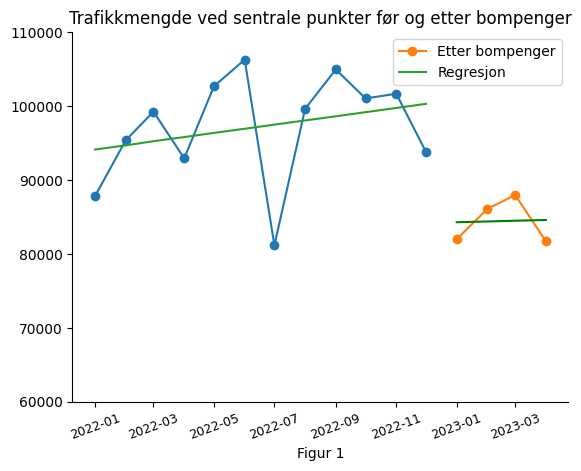

In [48]:
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  #  Fjerner false-postive warning. 

månedstrafikksum = månedstrafikk.groupby(['Dato'])['Trafikkmengde'].sum()
månedstrafikksum = månedstrafikksum.to_frame()
månedstrafikksum = månedstrafikksum.reset_index()
månedstrafikk2022 = månedstrafikksum[månedstrafikksum['Dato'] < '2023-01-01']
månedstrafikk2023 = månedstrafikksum[månedstrafikksum['Dato'] >= '2023-01-01']

# lager regresjon av verdier før bompenger
månedstrafikk2022['Time'] = np.arange(len(månedstrafikk2022.index))
X = månedstrafikk2022.loc[:, ['Time']] 
y = månedstrafikk2022.loc[:, 'Trafikkmengde']
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

# lager regresjon av verdier etter bompenger
månedstrafikk2023['Time'] = np.arange(len(månedstrafikk2023.index))
X2 = månedstrafikk2023.loc[:, ['Time']] 
y2 = månedstrafikk2023.loc[:, 'Trafikkmengde']
model = LinearRegression()
model.fit(X2, y2)
y_pred2 = pd.Series(model.predict(X2), index=X2.index)

# plotter
fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1')
ax.set_ylim(60000,110000)
ax.set_title('Trafikkmengde ved sentrale punkter før og etter bompenger')

ax.plot(månedstrafikk2022['Dato'],månedstrafikk2022['Trafikkmengde'], marker = 'o')
ax.plot(månedstrafikk2023['Dato'],månedstrafikk2023['Trafikkmengde'], marker = 'o', label = 'Etter bompenger')
ax.plot(månedstrafikk2022['Dato'],y_pred, label = 'Regresjon')
ax.plot(månedstrafikk2023['Dato'],y_pred2, color =  'green')

ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 
ax.legend(loc= 'best');

Figur 1 viser trafikkmengde ved: Breivika, Tverforbindelsen, Tromsø brua, Sandnessundbrua, Kvaløyvegen og Giæverbukta. Punktene er jevnt fordelt over Tromsø-øya, og gir et godt bilde av trafikken. 

Vi ser at trafikkmengden etter 2023 er lavere enn i året før. De grønne linjene viser to regresjoner, en for 2022 og for 2023. Her blir det mer tydelig at trafikkmengden er redusert en god del. Regresjonen 2022 er stigende, mens den for 2023 er nesten helt flat. 

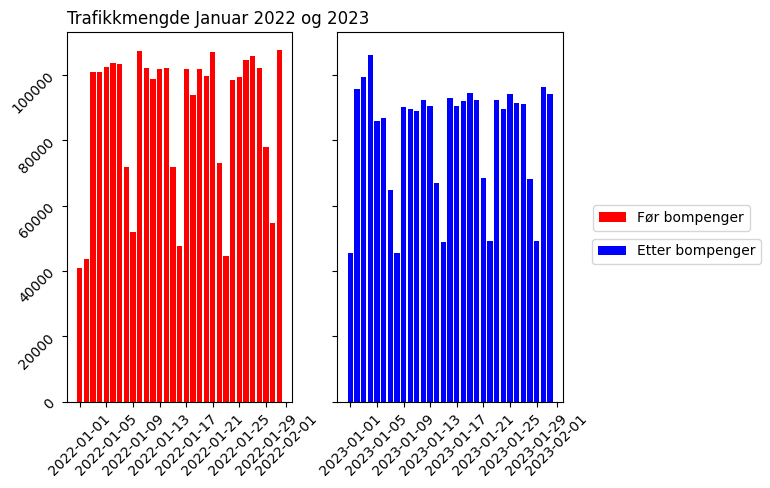

In [49]:
døgntrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/d%C3%B8gntrafikk3.csv', sep=';')
døgntrafikk = døgntrafikk.loc[(døgntrafikk.Felt == 'Totalt'), ['Dato','Trafikkmengde','Navn']] 
døgntrafikksum = døgntrafikk.groupby(['Dato'])['Trafikkmengde'].sum() 
døgntrafikksum = døgntrafikksum.to_frame()
døgntrafikksum = døgntrafikksum.reset_index()

døgntrafikksum['Dato'] = pd.to_datetime(døgntrafikksum['Dato'], dayfirst= True)
døgntrafikksum2 = døgntrafikksum[(døgntrafikksum['Dato'] >= '2023-01-01') & (døgntrafikksum['Dato'] < '2023-02-01')]
døgntrafikksum3 = døgntrafikksum[(døgntrafikksum['Dato'] >= '2022-01-01') & (døgntrafikksum['Dato'] < '2022-02-01')]

fig, (ax1,ax2) = plt.subplots(1,2, sharey= True)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1.2')
ax.set_ylim(0,150000)
ax1.bar(døgntrafikksum3['Dato'],døgntrafikksum3['Trafikkmengde'], color = 'red', label = 'Før bompenger')
ax2.bar(døgntrafikksum2['Dato'],døgntrafikksum2['Trafikkmengde'], color = 'blue', label = 'Etter bompenger')
ax.xaxis.set_tick_params(labelsize=9, rotation = 20)
ax1.set_title('Trafikkmengde Januar 2022 og 2023', loc = 'left')
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
ax1.legend(bbox_to_anchor=(3.06,0.55))
ax2.legend(bbox_to_anchor=(1.1,0.46))


Figuren viser trafikkmengden for Januar i 2022 og 2023. 

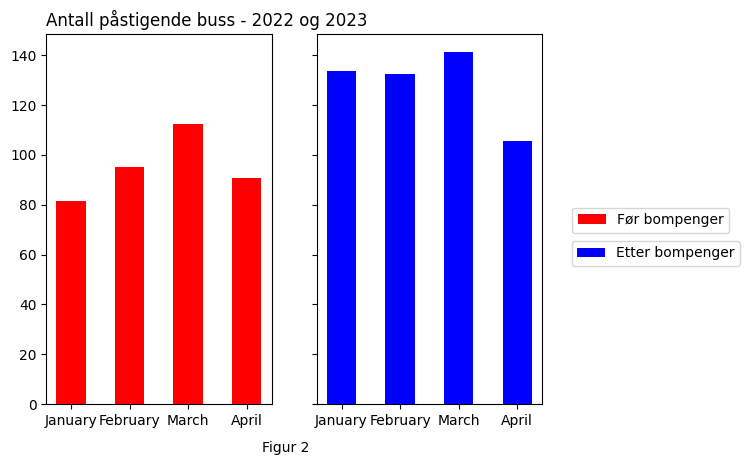

In [56]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)
df_buss2022 = df_buss[(df_buss['date'] >= '2022-01-01') & (df_buss['date'] <= '2022-04-30')]
df_buss2022 = df_buss2022.groupby(['date'])['Påstigende'].sum() 
df_buss2022 = df_buss2022.to_frame()
df_buss2022 = df_buss2022.reset_index()

# før bompenger
df_måned = df_buss2022.groupby(df_buss2022['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned = df_måned.to_frame()
df_måned = df_måned.reset_index()
df_måned['Påstigende'] = df_måned['Påstigende'].div(10000)
months = ["January","February","March","April"]
df_måned['date'] = pd.Categorical(df_måned['date'], categories= months, ordered=True)
df_måned.sort_values(by='date', inplace=True)

# etter bompenger
df_buss2 = df_buss[(df_buss['date'] >= '2023-01-01') & (df_buss['date'] <= '2023-04-30')]
df_måned2 = df_buss2.groupby(df_buss2['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned2 = df_måned2.to_frame()
df_måned2 = df_måned2.reset_index()
df_måned2['Påstigende'] = df_måned2['Påstigende'].div(10000)
months2 = ["January", "February", "March", "April"]
df_måned2['date'] = pd.Categorical(df_måned2['date'], categories= months2, ordered=True)
df_måned2.sort_values(by='date', inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.bar(df_måned['date'],df_måned["Påstigende"], width = 0.5 ,color = 'red',label = 'Før bompenger')
ax2.bar(df_måned2['date'],df_måned2["Påstigende"], width = 0.5 , color='blue',label = 'Etter bompenger')
ax1.set_title('Antall påstigende buss - 2022 og 2023', loc = 'left')
ax1.legend(bbox_to_anchor=(3.06,0.55))
ax2.legend(bbox_to_anchor=(1.1,0.46))
txt = 'Figur 2'
fig.text(.5, .01, txt, ha='center');

Figur 1.3 viser antall påstigende med buss før og etter bompenger. Her er verdiene delt på 10 000 slik at 80 er 800 000. Vi ser at antall påstigende har økt fra 2022 til 2023. I Januar har antallet økt med tilnærmet 64%, noe som er en markant økning fra året før. 

### Kapittel 3. Bilisters tilpasning til bompenger. 

Modellen som brukes i analysen er en forenkling av virkeligheten. Modellen bygger på noen forutsetninger: 
- Konsumenten velger mellom to goder som kan måles i noe entydig, som i dette tilfellet er kroner. 
- Nytten fra konsum er kun avhengig av eget konsum. 
- Prisene tas for gitt og konsumenten har full oversikt over egenskapene til godene. 
- Hele inntekten til konsumenten går til konsum, sparing blir således sett bort ifra. 
- Formålet til konsumenten er å makismere sin nytte, ved å konsumere mest mulig. 

Konsumenten kan velge mellom andre goder og antall kilometer kjørt. Begge valgmulighetene er blitt omgjort til kroner, slik at det blir et mål i penger. Andre goder er blitt gitt prisen 1, mens antall kilometer kjørt er regnet om prisen per kilometer. 

In [51]:
import requests
from pyjstat import pyjstat
postUrl = "https://data.ssb.no/api/v0/no/table/12576/"
apiQuery = { "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:FylkerGjeldende",
        "values": [
          "54"
        ]
      }
    },
    {
      "code": "Kjoretoytype",
      "selection": {
        "filter": "item",
        "values": [
          "15"
        ]
      }
    },
    {
      "code": "DrivstoffType",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "18"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "GjsnittKjorelengde"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020",
          "2021",
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }}
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds
df_kmkjørt, df_id, ds = apiToDataframe(postUrl, apiQuery)

##### Cobb Douglas modell

For å lage en CB modell trenger vi estimater for kostnand, budsjett og nyttepreferanse. TØI funnet distanseavhengige kostnader per kilometer som i 2022 var 3,03 kr per kilometer. Modellen vil ta i bruk dette estimatet for kostnand per kilometer før bompenger. Vi trenger også en kostnaden som påføres bilistenen etter bompenger. I en artikkel fra Nordlys (26.April.2023) får vi ferske tall fra Tenk Tromsø. De opplyser at en gjennomsnittlig billist i Tromsø brukte 366 kr på bompenger i Mars. Vi kan bruke dette til å regne kostnaden per kilometer ved å først dele måndedsbeløpet på antall dager i måneden, og deretter dele på antall km som blir kjørt i snitt per dag. Vi legger tallet sammen med den distanseavhengige kostnaden, og finner at kostnaden etter bompenger er på 3,61 kr per kilometer. For å tegne en budsjettlinjen trenger vi også et budsjett. Ifølge Statistisk Sentralbyrå (SSB) var gjennomsnittsinntekten i 2022 på 644 680 kroner. Vi kan regne om å bruke dette som estimat for dagsbudsjett.  

Ved å bruke disse estimatene har jeg i figuren under tegnet en budsjettbetingelse som viser budsjettet til en bilist før og etter bompenger. Det rosa området viser det reduserte mulighetsområdet som følge av de økte kostnadsnivået.

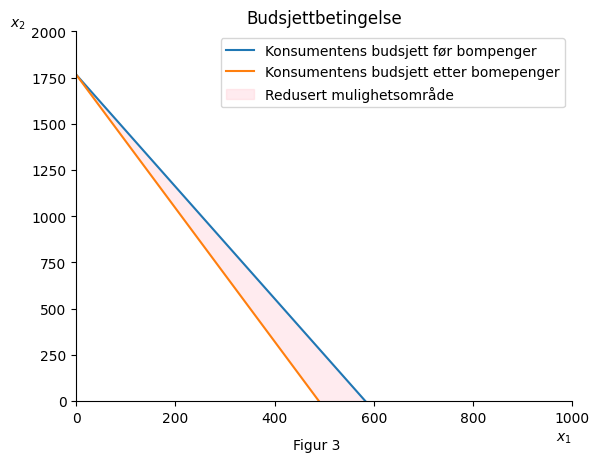

In [52]:

def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

x = np.linspace(0.001,1000,1000)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.set_xlim(0,1000)
                ax.set_ylim(0,2000)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x, budsjett(1766, 3.03, 1, x), label = 'Konsumentens budsjett før bompenger')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bomepenger')

ax.fill_between(x, budsjett(1766, 3.03, 1, x), budsjett(1766, 3.61, 1, x), color = "pink",alpha = 0.3,label='Redusert mulighetsområde')

ax.set_title('Budsjettbetingelse')
ax.legend(loc = 'best')
txt = 'Figur 3'
fig.text(.5, .01, txt, ha='center');


Her ser vi at endringen i pris på gode 1 (pris per km), ikke endrer konsumet av gode 2 (andre goder). Godene er dermed uavhengig i konsum. Dette er spesielt for Cobb Douglas funksjoner, ettersom det ikke er noen krysspriselastisitet. Konsumenten fortsetter således konsumere like mye av andre goder, når prisen på antall km kjørt øker. 

In [53]:
# symboler
x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
U

# vi må løse for x_2 og et gitt nyttenivå
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]
x_2_ind_sol

# gjør om for å plotte

indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(U_0,a,b,x_1)

# nye symboler
p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*x_1+p_2*x_2

# Beregne MSB

msb = sp.diff(U, x_1)/sp.diff(U,x_2)

# Løs likning (14)

x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]

# sett inn i m og løs for x_1

budsj=bud.subs(x_2,x_2_rel)
x_1_eq= sp.solve(budsj-m,x_1)[0]

# dette er likevektsløsning for x_1
#sett inn i x_2_rel for å få x_2_eq

x_2_eq= x_2_rel.subs(x_1,x_1_eq)

In [54]:
# steg 1 har vi løst x_1_eq og x_2_eq

# steg 2
U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

# Vi kan bruke tall i et oppslag for å regne numeriske verdier
# her er et eksempel
# la oss lage noen tall i et oppslag
in_dict = {"a":0.04,"b":0.96,"m":1766,"p_1":3.61,"p_2":1}

# Vi bruker disse tallene til å finne nytten som oppnås samt etterspørsel

nytte=sp.sympify(U_max).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_1_num=sp.sympify(x_1_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_2_num=sp.sympify(x_2_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})

# steg 3 
# vi har laget x_2_ind_sol som løsning
# og vi har laget en funksjon ved lambdify: indiff_x_2(U_0,a,b,x_1)

# Ta a=.4, b=.25, m=2000, p_1=25, p_2=40

# finn verdien for U_max, x_1_eq og x_2_eq


nytte = U_max.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.02),(p_2,1)])
x_1_num = x_1_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.02),(p_2,1)])
x_2_num = x_2_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.02),(p_2,1)])

nytte2 = U_max.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.61),(p_2,1)])
x_1_num2 = x_1_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.61),(p_2,1)])
x_2_num2 = x_2_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.61),(p_2,1)])

display(nytte)
display(x_1_num)
display(x_2_num)

display(nytte2)
display(x_1_num2)
display(x_2_num2)

1370.17575134656

29.2384105960265

1677.70000000000

1358.00467299760

24.4598337950139

1677.70000000000

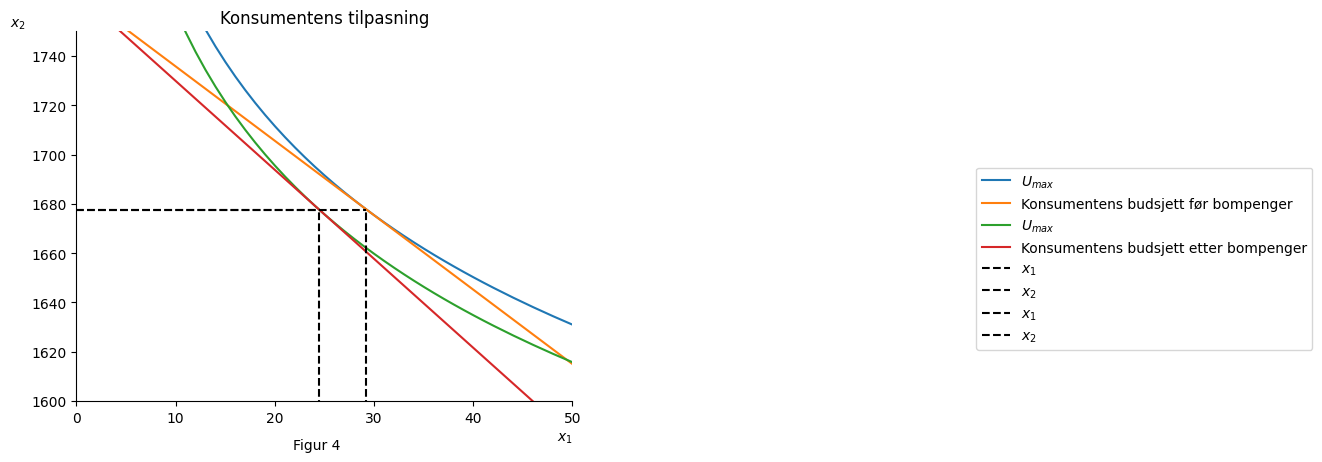

In [55]:
fig, ax = plt.subplots()
ax.set_ylabel('$x_2$', loc='top', rotation=0)
ax.set_xlabel('$x_1$', loc='right')
ax.set_xlim(0,1000)
ax.set_ylim(0,2000)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# før bompenger
ax.plot(x, indiff_x_2(nytte,.05,.95,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.02, 1, x), label = 'Konsumentens budsjett før bompenger')

# etter bompenger
ax.plot(x, indiff_x_2(nytte2,.05,0.95,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bompenger')

# tilpasningen
ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num,0,x_1_num, color='black',ls='dashed', label='$x_2$')

ax.vlines(x_1_num2,0,x_2_num2, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num2,0,x_1_num2, color='black',ls='dashed', label='$x_2$')

# tittel
ax.set_title('Konsumentens tilpasning')

#vis navnene:
ax.legend(bbox_to_anchor=(1.8,0.65));

plt.ylim(1600,1750)
plt.xlim(0,50)
txt = 'Figur 4'
fig.text(.5, .01, txt, ha='center');

Når prisen på antall km kjøring øker havner konsumenten på en ny indifferenskurve, med et lavere nytte nivå. Konsumenten har mye av andre goder, og lite av antall km kjørt. Det er altså tatt høyde for at konsumeten foretrekker andre goder fremfor antall km kjørt, noe som har som hensikt å gjenspeile virkeligheten. 

Formen på indifferenskurven forteller oss at konsumenten ikke er villig til å ofre mye av andre goder for å oppnå mer av antall km kjøring. Før bompenger kjører konsumenten 29.2 km og bruker 1370 kr på andre goder. Dette stemmer godt overens med tall fra SSB, da det i snitt ble kjørt 28,7 km i Tromsø kommune for 2022. Når kostnadsnivået øker tilspasser konsumenten seg å konsumerer 1358 av andre goder og 24,4 km kjøring, dette er en reduksjon på 16% fra før bompenger. 

Elastisiteten til etterspørselen etter km kjøring er på kort sikt særlig avhengig av subsitusjonsmuligheter i markedet. Altså hvor lett er det å bytte ut personbiltransport med andre midler for transport, feks kollektiv transport. Det er også avhengig av hvor stor andel av budsjettet som blir brukt på konsum av godet - jo større andel av budsjettet jo mer elastisk. 



### Kapittel 4. Konklusjon 